In [3]:
import os
import numpy as np
from aligner import VocalNoteAlign, extract_f0, hz_to_midi, read_wav, expand_seq
import matplotlib.pyplot as plt

/home/sjkim/anaconda3/envs/apc/lib/python3.10/site-packages/pretty_midi/instrument.py:11: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



[LOG] all notes shifted by 0


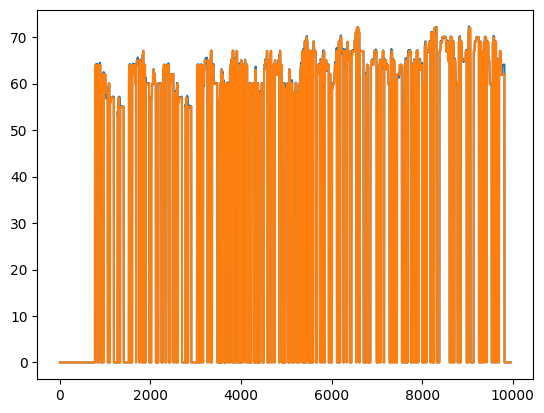

In [14]:
# Input wav and midi path
wav_path = "examples/example.wav"
mid_path = "examples/example.mid"

# Create the aligner object
_aligner = VocalNoteAlign(
    lambda_pitch=5,       # Weight for pitch difference
    lambda_duration=0.1,  # Weight for duration mismatch
    lambda_unvoiced=20,   # Penalty for unvoiced/silence mismatch
    sampling_rate=22050,
    hop_length=256
)

# Perform alignment
aligned_note_pitch, aligned_note_duration, *_ = _aligner(wav_path, mid_path)

# Visualize
wav = read_wav(wav_path, normalize=True)
vocal_pitch = hz_to_midi(extract_f0(wav, 22050, 256))
plt.plot(vocal_pitch)
plt.plot(expand_seq(aligned_note_pitch, aligned_note_duration))